**Mounting the Goodle Drive to Get the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Data Preprocessing**

**Converting the Train Image Data set into Numpy Array**

In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt


# Mount your Google Drive
drive.mount('/content/drive')

# Define the path to the train and test data directories
train_path = "/content/drive/MyDrive/Dataset/train"

# Get the list of all folders in the train directory
folders = os.listdir(train_path)

# Define the image size and the number of channels
img_size = 28
num_channels = 1

# Define the empty lists to store the images and their respective labels
x_train = []
y_train = []

# Loop through each folder and read the images
for folder in folders:
    # Define the path to the current folder
    folder_path = os.path.join(train_path, folder)
    # Get the list of all image files in the current folder
    files = os.listdir(folder_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(folder_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        x_train.append(img.flatten() / 255)
        # Append the image and its respective label to the lists
        #x_train.append(img)
        y_train.append(int(folder))

# Convert the lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Print the shape of the training data and target labels
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training data shape: (1000, 784)
Training labels shape: (1000,)


**Converting the Test Image Data set into Numpy Array**

In [ ]:
# Define the path to the train and test data directories
test_path = "/content/drive/MyDrive/Dataset/val"

# Get the list of all folders in the train directory
folders = os.listdir(test_path)

# Define the image size and the number of channels
img_size = 28
num_channels = 1

# Define the empty lists to store the images and their respective labels
x_test = []
y_test = []

# Loop through each folder and read the images
for folder in folders:
    # Define the path to the current folder
    folder_path = os.path.join(test_path, folder)
    # Get the list of all image files in the current folder
    files = os.listdir(folder_path)
    # Loop through each image and read it
    for file in files:
        # Define the path to the current image
        img_path = os.path.join(folder_path, file)
        # Read the image and resize it to the defined size
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_size, img_size))
        x_test.append(img.flatten() / 255)
        # Append the image and its respective label to the lists
        #x_train.append(img)
        y_test.append(int(folder))

# Convert the lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

# Print the shape of the training data and target labels
print("Training data shape:", x_test.shape)
print("Training labels shape:", y_test.shape)

Training data shape: (178, 784)
Training labels shape: (178,)


**Creating the CSV File named as Output and storing the train data numpy inside it with the corresponding labels and pixels**

In [ ]:
import numpy as np
# create a list of column names
# create a list of column names for the Xtrain data
column_names = ["pixel" + str(i) for i in range(784)]

# stack the Ytrain and Xtrain arrays horizontally
combined_data = np.column_stack((y_train, x_train))

# save the combined data to a CSV file
np.savetxt("output.csv", combined_data, delimiter=",", header="label," + ",".join(column_names), comments="")

**Creating the CSV File named as testoutput and storing the test data numpy inside it with the corresponding labels and pixels**

In [ ]:
import numpy as np
# create a list of column names for the Xtrain data
column_names = ["pixel" + str(i) for i in range(784)]

# stack the Ytrain and Xtrain arrays horizontally
combined_data = np.column_stack((y_test, x_test))

# save the combined data to a CSV file
np.savetxt("testoutput.csv", combined_data, delimiter=",", header="label," + ",".join(column_names), comments="")

**Data visualization-Train Data CSV File**

In [ ]:
import pandas as pd

data = pd.read_csv('output.csv')
data['label'] = data['label'].astype(int)
data.head(200)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,6,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.929412,0.929412,0.929412,0.929412,0.945098,1.000000,1.000000,1.000000,1.000000,1.000000
1,6,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.200000,0.929412,0.929412,0.929412,0.929412,0.929412
2,6,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.729412,0.929412
3,6,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.929412,0.929412,0.929412,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,6,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.929412,0.984314,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984314,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.972549,0.929412,0.333333,0.000000,0.066667
196,2,1.0,1.0,1.000000,0.964706,0.929412,0.929412,0.066667,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.964706,0.333333,0.000000,0.000000
197,2,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.972549,0.462745,0.000000,0.000000,0.000000
198,2,1.0,1.0,0.972549,0.929412,0.929412,0.929412,0.929412,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.952941,0.200000,0.000000


**Data visualization-Test Data CSV File**

In [ ]:
import pandas as pd

testdata = pd.read_csv('testoutput.csv')
testdata['label'] = testdata['label'].astype(int)
testdata.head(178)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,4,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.933333,0.862745,0.000000,...,0.596078,0.929412,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,4,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,4,1.0,1.0,0.972549,0.462745,0.0,0.000000,0.862745,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4,1.0,1.0,1.000000,1.000000,1.0,1.000000,0.933333,0.929412,0.729412,...,0.000000,0.729412,0.996078,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4,1.0,1.0,1.000000,1.000000,1.0,0.945098,0.066667,0.000000,0.200000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,7,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
174,7,1.0,1.0,1.000000,1.000000,1.0,0.945098,0.929412,0.929412,0.929412,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
175,7,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
176,7,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.996078,0.929412,...,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Data visualization-Printing Random Image in Train Data**

7


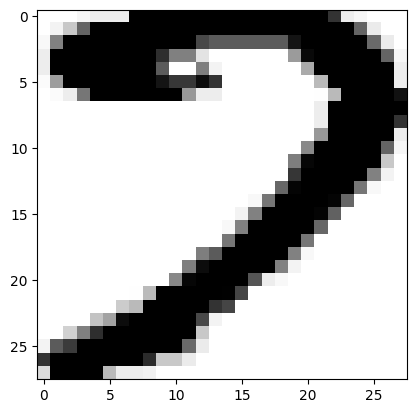

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# data_dev = data[0:100].T
# Y_dev = data_dev[0].astype(int)
# X_dev = data_dev[1:n]

data_train = data[0:m].T
Y_train = data_train[0].astype(int)
X_train = data_train[1:n]
_,m_train = X_train.shape

label = Y_train[1]
print(label)
current_image = X_train[:, 1, None]
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

**Data visualization-Printing Random Image in Test Data**

2


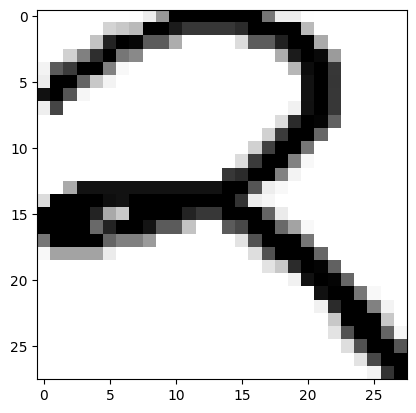

In [ ]:
testdata = np.array(testdata)
m, n = testdata.shape
np.random.shuffle(testdata) # shuffle before splitting into dev and training sets


data_dev = testdata[0:m].T
Y_dev = data_dev[0].astype(int)
X_dev = data_dev[1:n]


label = Y_dev[1]
print(label)
current_image = X_dev[:, 1, None]
current_image = current_image.reshape((28, 28)) * 255
plt.gray()
plt.imshow(current_image, interpolation='nearest')
plt.show()

**Checking Size and shape of Train Data**

In [ ]:
print(Y_train.shape)
print(X_train.shape)

(1000,)
(784, 1000)


**Checking Size and shape of Test Data**

In [ ]:
print(Y_dev.shape)
print(X_dev.shape)

(178,)
(784, 178)


#**NEURAL NETWORK FROM SCRATCH**

**Implementing NEURAL NETWORK FROM SCRATCH** 

In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    print("#"*100)
    print(A2)
    print(np.argmax(A2, 0))
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

**Initializing the Parameters for the Model**

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.01,   4000)


Streaming output truncated to the last 5000 lines.
 3 2 6 9 4 9 0 2 7 4 2 3 1 6 8 0 1 3 9 2 0 4 1 7 8 7 6 5 1 6 1 7 0 6 9 7 3
 0 6 7 2 8 4 1 0 8 8 5 1 8 7 9 0 0 5 1 2 6 0 2 2 5 3 1 2 1 2 3 8 5 6 1 5 4
 0 3 8 9 6 5 3 1 7 5 8 8 7 4 6 5 8 3 8 1 3 4 2 3 1 1 3 3 2 6 9 5 9 8 0 1 4
 3 7 9 7 9 2 2 0 2 4 0 7 6 4 8 5 7 3 5 6 6 7 5 9 3 8 9 7 5 2 7 2 0 6 0 4 6
 2 8 9 1 1 2 2 8 7 1 6 9 1 4 4 1 1 7 3 1 1 4 7 7 9 1 5 1 7 3 4 1 0 4 9 8 6
 0 5 8 3 7 3 9 7 2 1 4 9 6 9 1 8 6 0 4 9 2 1 1 7 3 4 9 2 4 9 3 0 0 6 3 0 6
 7 0 9 3 2 5 7 5 8 4 3 7 9 1 6 0 1 3 7 9 9 1 5 4 8 4 8 8 0 7 1 8 8 6 9 7 0
 4 3 1 8 2 4 4 6 7 4 7 2 2 1 9 9 3 4 4 4 0 0 8 8 9 5 7 6 9 4 4 6 5 3 9 2 1
 6 4 2 2 9 0 2 2 3 4 3 2 4 8 6 0 7 7 9 8 6 2 2 7 4 6 2 5 1 9 7 2 6 7 9 6 1
 8 3 2 4 3 6 4 2 1 5 1 8 2 3 1 3 5 2 5 4 5 3 4 7 0 2 1 8 7 3 1 8 3 0 9 0 3
 0 9 3 3 5 7 2 6 3 9 0 7 7 3 5 4 8 6 8 8 8 3 6 6 8 3 1 7 0 7 1 7 7 8 0 5 9
 3 5 1 2 2 6 8 4 8 1 8 4 3 3 3 8 9 3 0 5 5 6 6 3 7 4 5 1 5 7 9 7 0 5 0 5 5
 7 5 1 5 7 1 5 9 1 8 7 2 4 3 9 2 1 2 6 4 0 0 6 5 

##**Validating the Model**

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _,A2  = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

def test_prediction1(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

##**Checking the Predictions by the Model With Both Train and Test Data**

####################################################################################################
[[9.99991845e-01]
 [8.15432695e-06]
 [8.09988370e-11]
 [4.02682753e-30]
 [1.50116260e-21]
 [1.36173439e-14]
 [1.28114583e-19]
 [1.41424744e-10]
 [5.38863753e-16]
 [7.12272766e-15]]
[0]
Prediction:  [0]
Label:  0


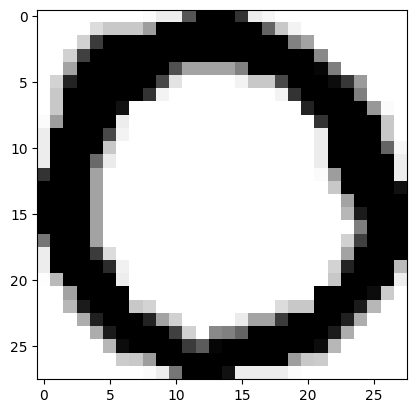

####################################################################################################
[[4.40332248e-07]
 [6.97515118e-04]
 [3.78932233e-09]
 [3.60202303e-11]
 [2.13659220e-04]
 [2.53836232e-12]
 [4.63989877e-15]
 [9.99088219e-01]
 [2.68975843e-17]
 [1.62377705e-07]]
[7]
Prediction:  [7]
Label:  7


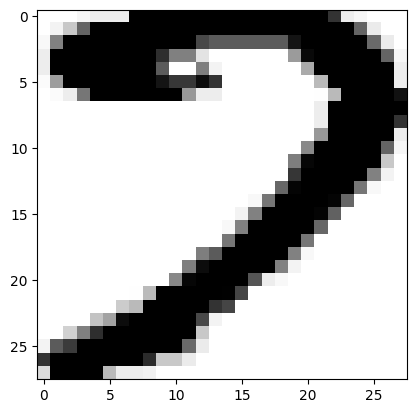

####################################################################################################
[[8.87100190e-18]
 [2.00545946e-14]
 [3.45130783e-09]
 [6.36167388e-14]
 [7.14438231e-07]
 [9.99999275e-01]
 [2.97868426e-09]
 [4.17082068e-09]
 [4.27798449e-10]
 [1.30573087e-14]]
[5]
Prediction:  [5]
Label:  5


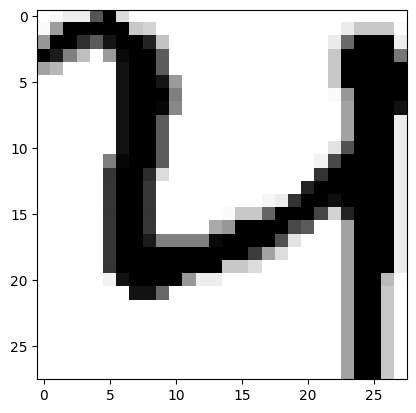

####################################################################################################
[[2.15918530e-11]
 [1.35341478e-04]
 [2.39004240e-07]
 [9.99852374e-01]
 [2.83217487e-07]
 [1.22463784e-12]
 [3.67368389e-06]
 [1.09383900e-12]
 [1.07653897e-07]
 [7.98089219e-06]]
[3]
Prediction:  [3]
Label:  3


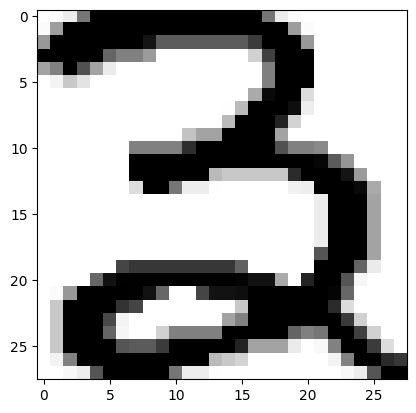

####################################################################################################
[[4.16696672e-14]
 [6.26792105e-05]
 [9.96133000e-01]
 [1.17773973e-03]
 [1.35302486e-07]
 [2.62570218e-03]
 [7.28556898e-07]
 [2.84065691e-12]
 [9.78391782e-09]
 [5.63315199e-09]]
[2]
Prediction:  [2]
Label:  2


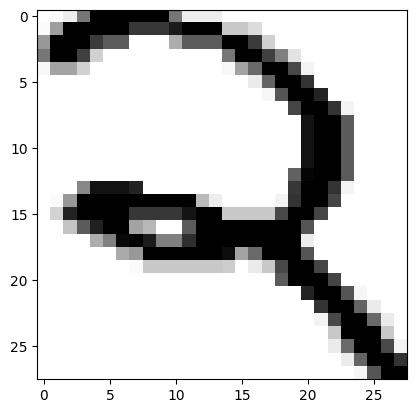

####################################################################################################
[[1.80837842e-13]
 [1.31990060e-04]
 [9.99657979e-01]
 [2.10028060e-04]
 [4.01200356e-12]
 [1.87198642e-09]
 [5.41658762e-10]
 [3.17700440e-13]
 [1.23190207e-14]
 [1.11241770e-10]]
[2]
Prediction:  [2]
Label:  2


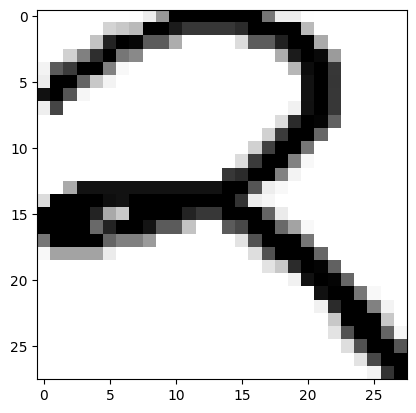

####################################################################################################
[[2.67292175e-07]
 [9.92806716e-01]
 [2.07972362e-10]
 [1.85246281e-07]
 [3.23446528e-04]
 [1.31173667e-10]
 [4.37804442e-09]
 [4.70040117e-10]
 [1.72053496e-05]
 [6.85217404e-03]]
[1]
Prediction:  [1]
Label:  1


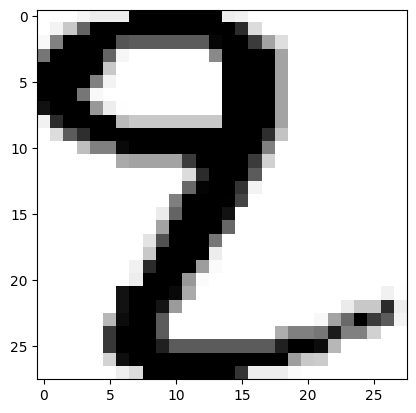

####################################################################################################
[[6.39741211e-07]
 [9.99243925e-01]
 [1.13578946e-04]
 [1.03477333e-09]
 [1.24957894e-07]
 [1.31910864e-09]
 [8.31816270e-12]
 [6.41516709e-04]
 [5.32566375e-16]
 [2.12572922e-07]]
[1]
Prediction:  [1]
Label:  1


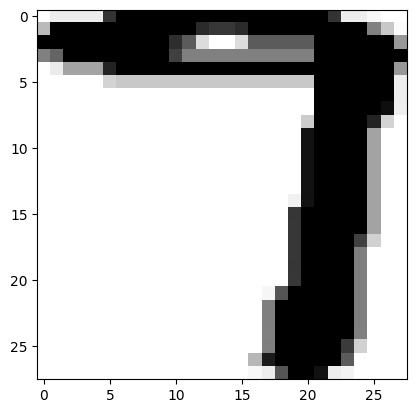

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

test_prediction1(0, W1, b1, W2, b2)
test_prediction1(1, W1, b1, W2, b2)
test_prediction1(2, W1, b1, W2, b2)
test_prediction1(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

####################################################################################################
[[4.16696672e-14 1.80837842e-13 2.67292175e-07 ... 1.36800138e-08
  5.54959792e-09 8.03985953e-14]
 [6.26792105e-05 1.31990060e-04 9.92806716e-01 ... 1.64616787e-06
  9.99207935e-01 6.54667153e-11]
 [9.96133000e-01 9.99657979e-01 2.07972362e-10 ... 8.34260092e-13
  1.24098336e-05 1.30871302e-09]
 ...
 [2.84065691e-12 3.17700440e-13 4.70040117e-10 ... 1.19442321e-08
  8.09826572e-05 6.74908182e-11]
 [9.78391782e-09 1.23190207e-14 1.72053496e-05 ... 5.84675007e-03
  6.64936549e-15 1.03299375e-03]
 [5.63315199e-09 1.11241770e-10 6.85217404e-03 ... 6.43741570e-01
  3.21839156e-05 3.93302527e-08]]
[2 2 1 1 4 4 1 9 8 8 2 5 0 1 8 3 9 8 7 9 9 0 8 6 7 8 9 7 6 2 7 6 8 0 7 0 4
 8 5 5 4 6 7 2 7 0 6 5 7 6 2 3 5 3 5 5 3 3 4 4 4 5 6 4 5 3 0 3 2 5 6 6 6 4
 4 5 4 0 1 7 6 9 1 2 5 8 6 1 5 0 7 2 3 9 5 4 7 5 9 9 8 6 9 9 0 3 7 1 9 0 3
 4 9 6 0 9 5 2 5 5 8 0 3 3 1 7 2 4 2 9 4 0 7 9 9 5 4 7 9 8 0 0 1 6 3 1 1 6

0.9213483146067416

**Also Checked the Model By Implementing using Keras**

Epoch 1/200
25/25 [==============================] - 1s 19ms/step - loss: 2.2846 - accuracy: 0.1925 - val_loss: 2.2486 - val_accuracy: 0.3800
Epoch 2/200
25/25 [==============================] - 0s 14ms/step - loss: 2.1759 - accuracy: 0.4250 - val_loss: 2.0537 - val_accuracy: 0.6050
Epoch 3/200
25/25 [==============================] - 0s 13ms/step - loss: 1.8563 - accuracy: 0.6112 - val_loss: 1.6137 - val_accuracy: 0.6700
Epoch 4/200
25/25 [==============================] - 0s 12ms/step - loss: 1.3655 - accuracy: 0.6488 - val_loss: 1.1698 - val_accuracy: 0.6050
Epoch 5/200
25/25 [==============================] - 0s 14ms/step - loss: 0.9896 - accuracy: 0.7475 - val_loss: 0.7824 - val_accuracy: 0.8500
Epoch 6/200
25/25 [==============================] - 0s 13ms/step - loss: 0.7536 - accuracy: 0.7962 - val_loss: 0.6027 - val_accuracy: 0.8350
Epoch 7/200
25/25 [==============================] - 0s 14ms/step - loss: 0.5874 - accuracy: 0.8350 - val_loss: 0.4533 - val_accuracy: 0.8950
Epoch 

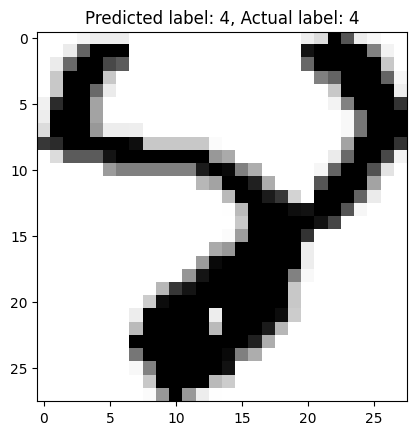

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load the data from CSV files
train_data = pd.read_csv("output.csv")
test_data = pd.read_csv("testoutput.csv")

# Split the data into input features (pixels) and target variable (labels)
X_train = train_data.iloc[:, 1:].values.astype('float32') / 255.0
y_train = train_data.iloc[:, 0].values.astype('int32')

X_test = test_data.iloc[:, 1:].values.astype('float32') / 255.0
y_test = test_data.iloc[:, 0].values.astype('int32')

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)

# Display a random image from the test set along with its predicted and actual labels
random_index = np.random.randint(0, len(X_test))
plt.imshow(X_test[random_index].reshape((28, 28)), cmap='gray')
plt.title("Predicted label: " + str(np.argmax(predictions[random_index])) + ", Actual label: " + str(y_test[random_index]))
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


**Model Evaluation Test Data On Neural Network Built from Scratch**

####################################################################################################
[[4.16696672e-14 1.80837842e-13 2.67292175e-07 ... 1.36800138e-08
  5.54959792e-09 8.03985953e-14]
 [6.26792105e-05 1.31990060e-04 9.92806716e-01 ... 1.64616787e-06
  9.99207935e-01 6.54667153e-11]
 [9.96133000e-01 9.99657979e-01 2.07972362e-10 ... 8.34260092e-13
  1.24098336e-05 1.30871302e-09]
 ...
 [2.84065691e-12 3.17700440e-13 4.70040117e-10 ... 1.19442321e-08
  8.09826572e-05 6.74908182e-11]
 [9.78391782e-09 1.23190207e-14 1.72053496e-05 ... 5.84675007e-03
  6.64936549e-15 1.03299375e-03]
 [5.63315199e-09 1.11241770e-10 6.85217404e-03 ... 6.43741570e-01
  3.21839156e-05 3.93302527e-08]]
[2 2 1 1 4 4 1 9 8 8 2 5 0 1 8 3 9 8 7 9 9 0 8 6 7 8 9 7 6 2 7 6 8 0 7 0 4
 8 5 5 4 6 7 2 7 0 6 5 7 6 2 3 5 3 5 5 3 3 4 4 4 5 6 4 5 3 0 3 2 5 6 6 6 4
 4 5 4 0 1 7 6 9 1 2 5 8 6 1 5 0 7 2 3 9 5 4 7 5 9 9 8 6 9 9 0 3 7 1 9 0 3
 4 9 6 0 9 5 2 5 5 8 0 3 3 1 7 2 4 2 9 4 0 7 9 9 5 4 7 9 8 0 0 1 6 3 1 1 6

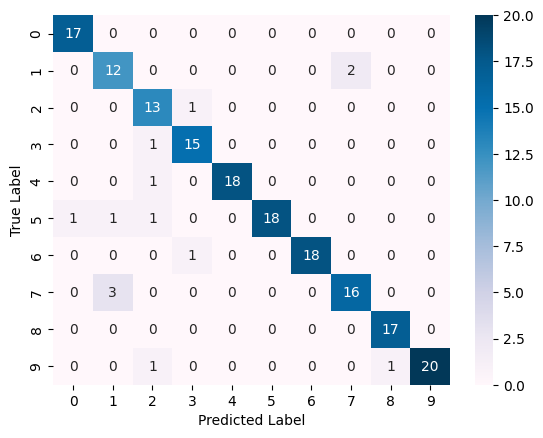

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Accuracy",get_accuracy(dev_predictions, Y_dev))
# Generate confusion matrix and heatmap
conf_matrix = confusion_matrix(dev_predictions, Y_dev)
print("conf_matrix : ","\n")
print(conf_matrix,"\n")
# Set the color palette
sns.set_palette("PuBu")

# Create the heatmap
sns.heatmap(conf_matrix, annot=True, cmap="PuBu", fmt="d")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()